## Sample sizes and $\sigma_{z,0}$

In this notebook we write simple code to calculate the sizes of galaxy samples, $N_g$, and mean (Gaussian) photo-z errors $\langle \sigma_{z}/(1+z) \rangle$.

In [51]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate 
from code.plot_utils import plot_pretty
from astropy.io import fits
#import skymapper as skm

%matplotlib inline
%pylab inline 
plot_pretty()

Populating the interactive namespace from numpy and matplotlib


### Flux Limited Sample, $i<22$ .

Import a flux limited sample (limit $i < 22$) from the DES Y3 data.

In [52]:
# Import the data for the flux limited sample
Y3 = fits.open('DESY3.fits')
print Y3[1].header.keys

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   60 / length of dimension 1                          
NAXIS2  =              1551220 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   12 / number of table fields                         
TTYPE1  = 'dnf_zmc_mof'                                                         
TFORM1  = 'E       '                                                            
TTYPE2  = 'dnf_zmean_mof'                                                       
TFORM2  = 'E       '                                                            

In [53]:
z_mc = Y3[1].data['dnf_zmc_mof']
z_mean = Y3[1].data['dnf_zmean_mof']
z_sig = Y3[1].data['dnf_zsigma_mof']
# ============================================================
# ============================================================
i_auto = Y3[1].data['mag_auto_i']
g_auto = Y3[1].data['mag_auto_g']
r_auto = Y3[1].data['mag_auto_r']
z_auto = Y3[1].data['mag_auto_z']
spread_model_i = Y3[1].data['spread_model_i']
speraderr_model_i = Y3[1].data['spreaderr_model_i']

##### Apply cuts

We will perform some preliminary quality cuts:

Cuts for color outliers (related star-galaxy separation):

\begin{eqnarray}
- 1 < g_{auto} - r_{auto} < 3\\
- 1 < r_{auto} - i_{auto} < 2.5 \\
- 1 < i_{auto} - z_{auto} < 1.7 \\
\end{eqnarray}

Completeness:
\begin{equation}
i_{auto} < 22
\end{equation}

Quality:
\begin{equation}
flags\_badregion < 4\,\, ; \,\, flags\_gold = 0
\end{equation}

Star-galaxy separation: 
\begin{equation}
spread\_model\_i + (5/3)spreaderr\_model\_i > 0.007
\end{equation}

In [54]:
# Define the cuts first
# ======================================================================
star_gal_cut = ((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)
color_cuts_1 =((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)
color_cuts_2 = ((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)
color_cuts_3 = ((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)
color_cut = color_cuts_1&color_cuts_2&color_cuts_3
outlier_cut  = (z_mean<1.5)&(z_mean>0.0)&(z_mc<1.5)

total_cuts = star_gal_cut&color_cut&outlier_cut
# =================================================================================
# =================================================================================
# =================================================================================
# Apply the cuts now 
z_mc_1 = z_mc[total_cuts]
z_mean_1 = z_mean[total_cuts]
z_sig_1 = z_sig[total_cuts]

#===================================================================================
i_auto_1 = i_auto[total_cuts]
g_auto_1 = g_auto[total_cuts]
r_auto_1 = r_auto[total_cuts]
z_auto_1 = z_auto[total_cuts]

Size of the sample after these cuts (in millions):

In [55]:
print(64.0*np.size(z_mc_1)/1e6)

65.200064


###### Select a specific region

We are going to consider angular clustering in the region $z \in [0.2-0.95]$ (five bins)

Find the total number of galaxies (sample size) in that region.

The selection is based on the mean redshift



In [56]:
print(64.0*np.size(z_mc_1[(z_mean_1>0.20)&(z_mean_1<0.95)])/1e6)


59.632064


So, in the region $z \in [0.2.0-0.95]$ we have $\sim 59.63$ million galaxies in total, for the flux limited sample $i < 22$.

#### Exploring the bins

We consider the five bins:

- Bin 1: $z \in [0.20-0.35]$

- Bin 2: $z \in [0.35-0.50]$

- Bin 3: $z \in [0.50-0.65]$

- Bin 4: $z \in [0.65-0.80]$

- Bin 5: $z \in [0.80-0.95]$


Let's split the sample in these five bins and calculate the number of galaxies in each bin. 

In [57]:
# Bin 1
z_mc_b1 = z_mc_1[(z_mean_1>0.2)&(z_mean_1<0.35)]
z_mean_b1 = z_mean_1[(z_mean_1>0.2)&(z_mean_1<0.35)]
z_sig_b1 = z_sig_1[(z_mean_1>0.2)&(z_mean_1<0.35)]
# ==============================================================
# ==============================================================
# Bin 2
z_mc_b2 = z_mc_1[(z_mean_1>0.35)&(z_mean_1<0.50)]
z_mean_b2 = z_mean_1[(z_mean_1>0.35)&(z_mean_1<0.50)]
z_sig_b2 = z_sig_1[(z_mean_1>0.35)&(z_mean_1<0.50)]
# ==============================================================
# ==============================================================
# Bin 3 
z_mc_b3 = z_mc_1[(z_mean_1>0.50)&(z_mean_1<0.65)]
z_mean_b3 = z_mean_1[(z_mean_1>0.50)&(z_mean_1<0.65)]
z_sig_b3 = z_sig_1[(z_mean_1>0.50)&(z_mean_1<0.65)]
# ==============================================================
# ==============================================================
# Bin 4
z_mc_b4 = z_mc_1[(z_mean_1>0.65)&(z_mean_1<0.80)]
z_mean_b4 = z_mean_1[(z_mean_1>0.65)&(z_mean_1<0.80)]
z_sig_b4 = z_sig_1[(z_mean_1>0.65)&(z_mean_1<0.80)]
# ==============================================================
# ==============================================================
# Bin 5
z_mc_b5 = z_mc_1[(z_mean_1>0.80)&(z_mean_1<0.95)]
z_mean_b5 = z_mean_1[(z_mean_1>0.80)&(z_mean_1<0.95)]
z_sig_b5 = z_sig_1[(z_mean_1>0.80)&(z_mean_1<0.95)]

The number of galaxies at each bin is (in millions):

In [58]:
print(64.0*np.size(z_mc_b1)/1e6)
print(64.0*np.size(z_mc_b2)/1e6)
print(64.0*np.size(z_mc_b3)/1e6)
print(64.0*np.size(z_mc_b4)/1e6)
print(64.0*np.size(z_mc_b5)/1e6)

8.142976
20.46752
14.557888
10.425088
6.038528


#### Find photo-z errors

Now we will try to find the mean $\sigma_{z,0} = \sigma_{z}/(1+z)$ of the flux limited sample at the whole range $z \in [0.2-0.95]$, and in each of the above five bins.

Note that for the flux limited sample the photo-z PDFs cannot be described as simple Gaussians. However, we will try to find the best fit Gaussian, and use the width $\sigma$ of this best fit Gaussian as our photo-z spread.

We treat:

- z_mean $\to$ as the photo-z estimate
- z_mc $\to$ "true" z


In [59]:
from scipy import stats

In [60]:
# Calculate "true"-"estimated" difference
# =================================================
# =================================================
dif_1 = (z_mean_b1 - z_mc_b1)/(1.0 + z_mc_b1)
dif_2 = (z_mean_b2 - z_mc_b2)/(1.0 + z_mc_b2)
dif_3 = (z_mean_b3 - z_mc_b3)/(1.0 + z_mc_b3)
dif_4 = (z_mean_b4 - z_mc_b4)/(1.0 + z_mc_b4)
dif_5 = (z_mean_b5 - z_mc_b5)/(1.0 + z_mc_b5)

###### Bin 1

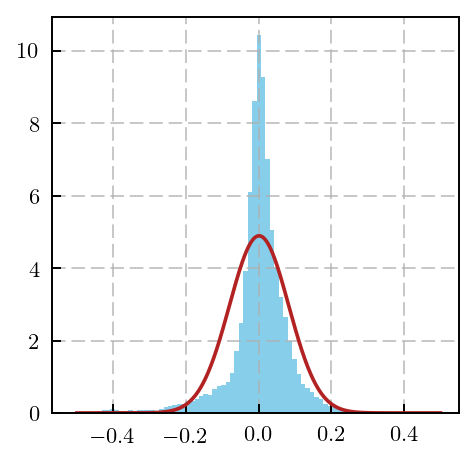

(0.0011115894, 0.081558272)


In [61]:
zs = np.linspace(-0.5,0.5,500)
m_1, s_1 = stats.norm.fit(dif_1)
gauss_1 = stats.norm.pdf(zs, m_1, s_1)
plot_pretty() 
fig = plt.figure(figsize = (3,3))
plt.hist(dif_1, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_1, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_1,s_1)

###### Bin 2

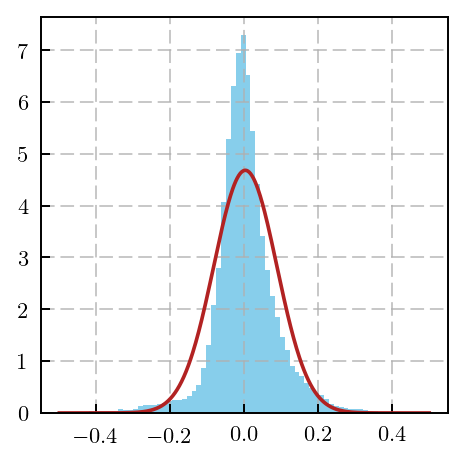

(0.0027317579, 0.085202694)


In [62]:
m_2, s_2 = stats.norm.fit(dif_2)
gauss_2 = stats.norm.pdf(zs, m_2, s_2)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_2, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_2, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_2,s_2)

###### Bin 3

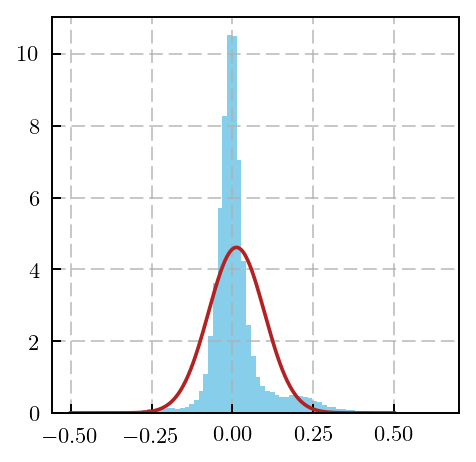

(0.012295105, 0.086512014)


In [63]:
m_3, s_3 = stats.norm.fit(dif_3)
gauss_3 = stats.norm.pdf(zs, m_3, s_3)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_3, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_3, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_3,s_3)

###### Bin 4

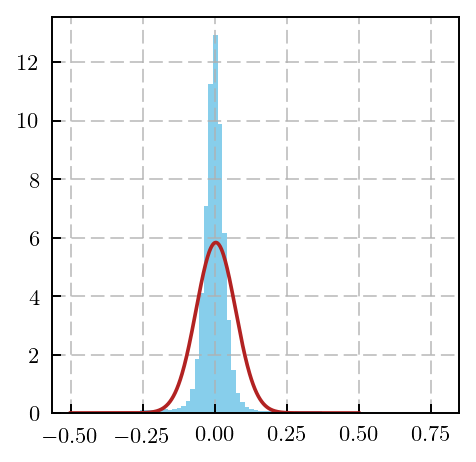

(0.0040929602, 0.068384245)


In [64]:
m_4, s_4 = stats.norm.fit(dif_4)
gauss_4 = stats.norm.pdf(zs, m_4, s_4)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_4, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_4, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_4,s_4)

###### Bin 5

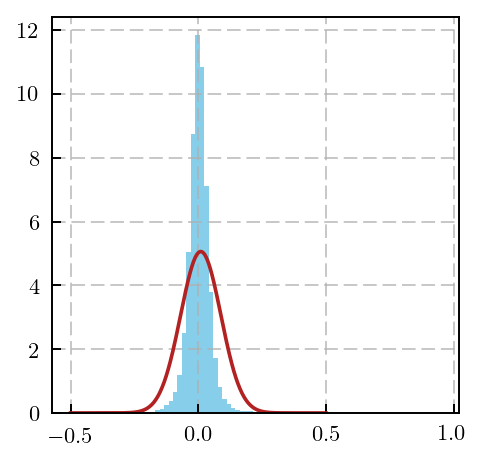

(0.0098342542, 0.078839228)


In [65]:
m_5, s_5 = stats.norm.fit(dif_5)
gauss_5 = stats.norm.pdf(zs, m_5, s_5)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_5, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_5, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_5,s_5)

##### For the total sample now in the range $z \in 0.2-0.95$ 

Call this "total" range

In [66]:
# Define the total range
z_mc_tot = z_mc_1[(z_mean_1>0.2)&(z_mean_1<0.95)]
z_mean_tot = z_mean_1[(z_mean_1>0.2)&(z_mean_1<0.95)]
z_sig_tot = z_sig_1[(z_mean_1>0.2)&(z_mean_1<0.95)]
# =========================================================
# =========================================================
# Calculate the difference
dif_tot = (z_mean_tot - z_mc_tot)/(1.0 + z_mc_tot)

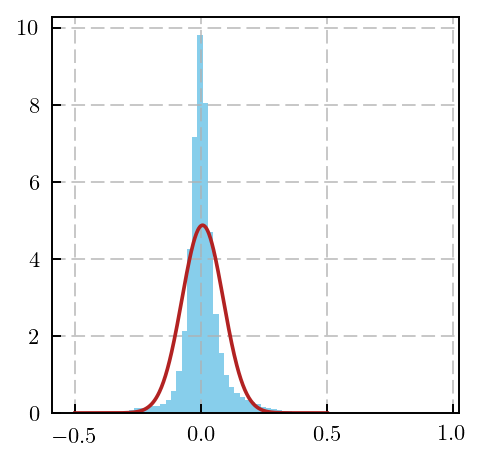

(0.0058024041, 0.081809454)


In [67]:
m_tot, s_tot = stats.norm.fit(dif_tot)
gauss_tot = stats.norm.pdf(zs, m_tot, s_tot)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_tot, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_tot, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_tot,s_tot)

In [68]:
print(np.mean(z_sig_b1/(1.0+z_mc_b1)))
print(np.mean(z_sig_b2/(1.0+z_mc_b2)))
print(np.mean(z_sig_b3/(1.0+z_mc_b3)))
print(np.mean(z_sig_b4/(1.0+z_mc_b4)))
print(np.mean(z_sig_b5/(1.0+z_mc_b5)))

0.0534935
0.0533249
0.0638238
0.061279
0.0575093


In [69]:
print(np.mean(z_sig_tot/(1.0+z_mc_tot)))

0.0577253


### redMaGiC samples

Calculate size and mean $\sigma_{z,0}$ for the photo-z sample, in the range $z \in [0.2-0.95]$ and in each of the five bins defined above.

In [70]:
from numpy.random import normal as gauss

In [71]:
RED_1 = fits.open('Redmagic_highdens_0.5_10.fit')
RED_2 = fits.open('Redmagic_highlum_1.0-04.fit')
RED_3 = fits.open('Redmagic_higherlum_1.5-01.fit')

In [72]:
red_photo_z_1  = RED_1[1].data['ZREDMAGIC']
red_error_z_1 = RED_1[1].data['ZREDMAGIC_E']
#============================================
red_photo_z_2  = RED_2[1].data['ZREDMAGIC']
red_error_z_2 = RED_2[1].data['ZREDMAGIC_E']
#============================================
red_photo_z_3  = RED_3[1].data['ZREDMAGIC']
red_error_z_3 = RED_3[1].data['ZREDMAGIC_E']

Although alternative approaches may be taken, I will form the lens redMaGiC sample in a way similar to how it was defined in DES Y1 data:

For the first three bins ($z \in [0.20-0.65]$) I will use the high-density sample, then for the fourth bin ($ z \in [0.65-0.80]$) we use the high-luminosity sample and finally for the last bin ($ z \in [0.80-0.95]$) we use the higher-luminosity sample.

In [73]:
true_z_1 = gauss(red_photo_z_1,red_error_z_1)
true_z_2 = gauss(red_photo_z_2,red_error_z_2)
true_z_3 = gauss(red_photo_z_3,red_error_z_3)

In [74]:
true_z_1 = true_z_1[(red_photo_z_1>0.2)&(red_photo_z_1<0.65)]
true_z_2 = true_z_2[(red_photo_z_2>0.65)&(red_photo_z_2<0.80)]
true_z_3 = true_z_3[(red_photo_z_3>0.80)&(red_photo_z_3<0.95)]
# =====================================================================
# =====================================================================
mean_1 = red_photo_z_1[(red_photo_z_1>0.20)&(red_photo_z_1<0.65)]
mean_2 = red_photo_z_2[(red_photo_z_2>0.65)&(red_photo_z_2<0.80)]
mean_3 = red_photo_z_3[(red_photo_z_3>0.80)&(red_photo_z_3<0.95)]
# =====================================================================
# =====================================================================
sig_1 = red_error_z_1[(red_photo_z_1>0.20)&(red_photo_z_1<0.65)]
sig_2 = red_error_z_2[(red_photo_z_2>0.65)&(red_photo_z_2<0.80)]
sig_3 = red_error_z_3[(red_photo_z_3>0.80)&(red_photo_z_3<0.95)]

In [75]:
true_z_rm = np.concatenate((true_z_1,true_z_2,true_z_3))
mean_z_rm = np.concatenate((mean_1,mean_2,mean_3))
sig_z_rm = np.concatenate((sig_1,sig_2,sig_3))

print(np.size(true_z_rm)/1e6)

2.668576


The total size of the sample is $\sim$ 2.67 million galaxies

#### Split the sample into the five bins defined above

In [85]:
# Bin 1 - z:[0.2-0.35]
true_z_b1 = true_z_rm[(mean_z_rm>0.20)&(mean_z_rm<0.35)]
mean_z_b1 = mean_z_rm[(mean_z_rm>0.20)&(mean_z_rm<0.35)]
sig_z_b1 = sig_z_rm[(mean_z_rm>0.20)&(mean_z_rm<0.35)]
# ==================================================================
# Bin 2 - z:[0.35-0.50]
true_z_b2 = true_z_rm[(mean_z_rm>0.35)&(mean_z_rm<0.50)]
mean_z_b2 = mean_z_rm[(mean_z_rm>0.35)&(mean_z_rm<0.50)]
sig_z_b2 = sig_z_rm[(mean_z_rm>0.35)&(mean_z_rm<0.50)]
# ==================================================================
# Bin 3 - z:[0.50-0.65]
true_z_b3 = true_z_rm[(mean_z_rm>0.50)&(mean_z_rm<0.65)]
mean_z_b3 = mean_z_rm[(mean_z_rm>0.50)&(mean_z_rm<0.65)]
sig_z_b3 = sig_z_rm[(mean_z_rm>0.50)&(mean_z_rm<0.65)]
# ==================================================================
# Bin 4 - z:[0.65-0.80]
true_z_b4 = true_z_rm[(mean_z_rm>0.65)&(mean_z_rm<0.80)]
mean_z_b4 = mean_z_rm[(mean_z_rm>0.65)&(mean_z_rm<0.80)]
sig_z_b4 = sig_z_rm[(mean_z_rm>0.65)&(mean_z_rm<0.80)]
# ==================================================================
# Bin 5 - z:[0.80-0.95]
true_z_b5 = true_z_rm[(mean_z_rm>0.80)&(mean_z_rm<0.95)]
mean_z_b5 = mean_z_rm[(mean_z_rm>0.80)&(mean_z_rm<0.95)]
sig_z_b5 = sig_z_rm[(mean_z_rm>0.80)&(mean_z_rm<0.95)]

Let's print their sizes

In [86]:
print(np.size(true_z_b1)/1e3)
print(np.size(true_z_b2)/1e3)
print(np.size(true_z_b3)/1e3)
print(np.size(true_z_b4)/1e3)
print(np.size(true_z_b5)/1e3)

326.42
652.74
983.146
530.926
175.344


###### Redshift error of the redMaGiC sample

In the five bins first

In [87]:
# Bin 1
print(np.mean(sig_z_b1/(1.0+true_z_b1)))
# Bin 2
print(np.mean(sig_z_b2/(1.0+true_z_b2)))
# Bin 3
print(np.mean(sig_z_b3/(1.0+true_z_b3)))
# Bin 4
print(np.mean(sig_z_b4/(1.0+true_z_b4)))
# Bin 5
print(np.mean(sig_z_b5/(1.0+true_z_b5)))

0.0119289330512
0.0158392585802
0.0164132404801
0.0208674509957
0.0163488617785


And of the total sample

In [88]:
print(np.mean(sig_z_rm/(1.0+true_z_rm)))

0.0166062794555


Let's do the same by fitting gaussians, as we did for the flux limited sample

In [89]:
# calculate the differences
# =================================================
dif_1 = (mean_z_b1 - true_z_b1)/(1.0 + true_z_b1)
dif_2 = (mean_z_b2 - true_z_b2)/(1.0 + true_z_b2)
dif_3 = (mean_z_b3 - true_z_b3)/(1.0 + true_z_b3)
dif_4 = (mean_z_b4 - true_z_b4)/(1.0 + true_z_b4)
dif_5 = (mean_z_b5 - true_z_b5)/(1.0 + true_z_b5)

###### Bin 1

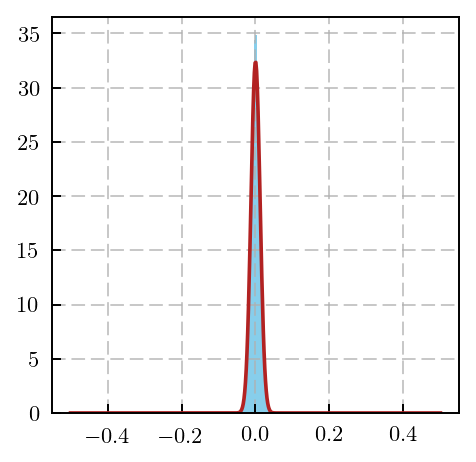

(0.00011312175750583092, 0.012309153179846904)


In [90]:
zs = np.linspace(-0.5,0.5,500)
m_1, s_1 = stats.norm.fit(dif_1)
gauss_1 = stats.norm.pdf(zs, m_1, s_1)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_1, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_1, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_1,s_1)

###### Bin 2

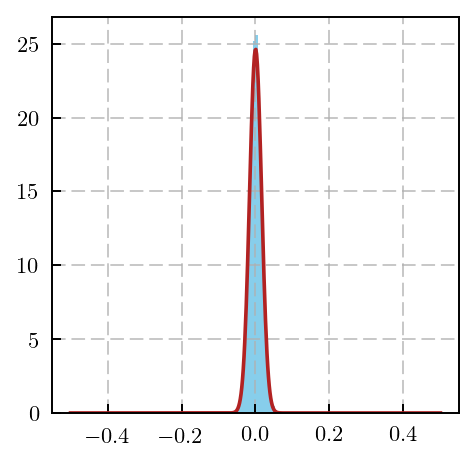

(0.00027456595032011931, 0.016188773359887536)


In [91]:
m_2, s_2 = stats.norm.fit(dif_2)
gauss_2 = stats.norm.pdf(zs, m_2, s_2)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_2, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_2, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_2,s_2)

###### Bin 3

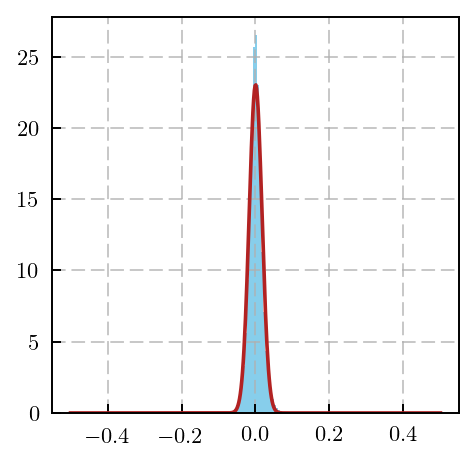

(0.00030243074100281988, 0.017319134866245398)


In [92]:
m_3, s_3 = stats.norm.fit(dif_3)
gauss_3 = stats.norm.pdf(zs, m_3, s_3)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_3, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_3, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_3,s_3)

###### Bin 4

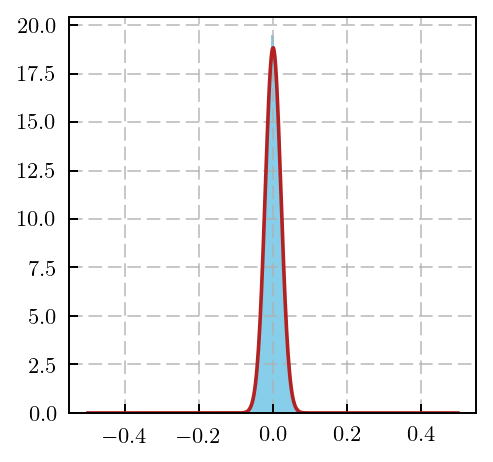

(0.00046175360547229374, 0.02117723801049029)


In [93]:
m_4, s_4 = stats.norm.fit(dif_4)
gauss_4 = stats.norm.pdf(zs, m_4, s_4)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_4, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_4, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_4,s_4)

###### Bin 5

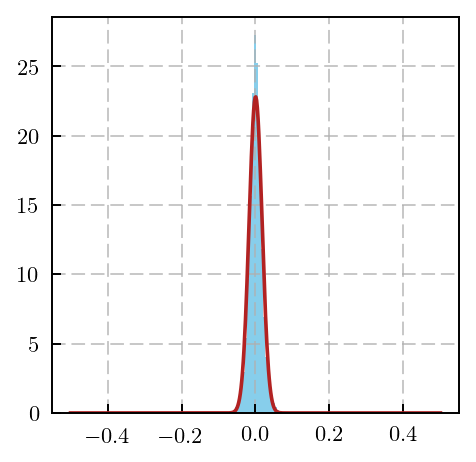

(0.00028398620122239607, 0.017477975876861319)


In [94]:
m_5, s_5 = stats.norm.fit(dif_5)
gauss_5 = stats.norm.pdf(zs, m_5, s_5)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_5, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_5, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_5,s_5)

###### And the total one now

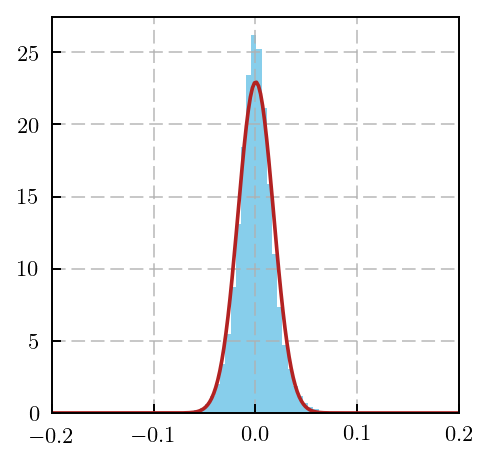

(0.00030294480164592985, 0.017391182198246813)


In [99]:
dif_tot = (mean_z_rm - true_z_rm)/(1.0 + true_z_rm)

m_tot, s_tot = stats.norm.fit(dif_tot)
gauss_tot = stats.norm.pdf(zs, m_tot, s_tot)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_tot, bins=100, color= 'skyblue',normed=True)
plt.plot(zs, gauss_tot, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.xlim(-0.2,0.2)
plt.show()
print(m_tot,s_tot)